In [1]:
import io
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def getdata(tickers,start,end,frequency):
    OHLC = {}
    cookie = ''
    crumb = ''
    res = requests.get('https://finance.yahoo.com/quote/SPY/history')
    cookie = res.cookies['B']
    pattern = re.compile('.*"CrumbStore":\{"crumb":"(?P<crumb>[^"]+)"\}')
    for line in res.text.splitlines():
        m = pattern.match(line)
        if m is not None:
            crumb = m.groupdict()['crumb']
    for ticker in tickers:
        url_str = "https://query1.finance.yahoo.com/v7/finance/download/%s"
        url_str += "?period1=%s&period2=%s&interval=%s&events=history&crumb=%s"
        url = url_str % (ticker, start, end, frequency, crumb)
        res = requests.get(url, cookies={'B': cookie}).text
        OHLC[ticker] = pd.read_csv(io.StringIO(res), index_col=0,
                                   error_bad_lines=False).replace('null', np.nan).dropna()
        OHLC[ticker].index = pd.to_datetime(OHLC[ticker].index)
        OHLC[ticker] = OHLC[ticker].apply(pd.to_numeric)
    return OHLC

In [2]:
tickers = ['%5EGSPTSE','%5EGSPC']

data = getdata(tickers,'946616400','1538280000','1d')
data['%5EGSPC']
# if you find erro b'Skipping line 4: expected 1 fields, saw 2\n'
# means that something went wrong getting data from Yahoo finance
# just try to run this code of block again

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,1464.469971,1472.420044,1458.189941,1469.250000,1469.250000,374050000
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000


In [3]:
data['%5EGSPTSE']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,8399.099609,8413.799805,8379.200195,8413.799805,8413.799805,21459900.0
2000-01-03,8413.799805,8413.799805,8413.799805,8413.799805,8413.799805,0.0
2000-01-04,8271.700195,8305.900391,8157.600098,8202.599609,8202.599609,59509800.0
2000-01-05,8100.200195,8147.200195,8018.600098,8119.399902,8119.399902,94545700.0
2000-01-06,8137.000000,8186.399902,8075.700195,8114.200195,8114.200195,79690100.0
2000-01-07,8193.400391,8430.000000,8193.400391,8429.400391,8429.400391,87693100.0
2000-01-10,8544.299805,8610.799805,8509.099609,8602.500000,8602.500000,83317000.0
2000-01-11,8581.599609,8634.700195,8442.599609,8442.599609,8442.599609,87836900.0
2000-01-12,8444.299805,8444.299805,8327.500000,8360.000000,8360.000000,85409000.0


In [4]:
boughtSP500 = float(data['%5EGSPC']['Adj Close'][:1])
soldSP500 = data['%5EGSPC']['Adj Close']
BuyHoldSP500 = soldSP500/boughtSP500-1

boughtTSX = float(data['%5EGSPTSE']['Adj Close'][:1])
soldTSX = data['%5EGSPTSE']['Adj Close']
BuyHoldTSX = soldTSX/boughtTSX-1

BuyHoldBoth = BuyHoldSP500*0.5+BuyHoldTSX*0.5

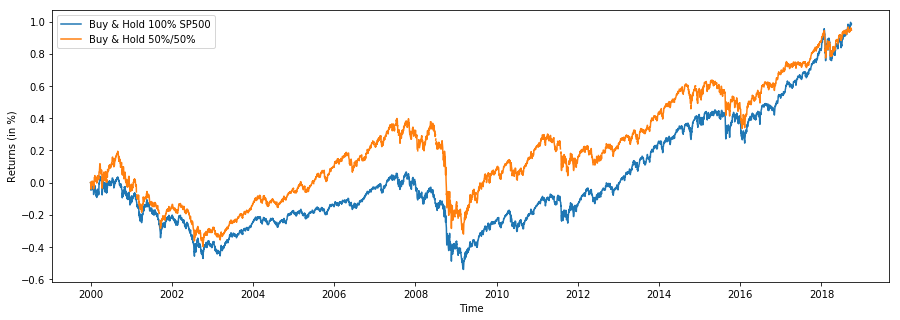

In [5]:
plt.figure(figsize=(15,5))
plt.plot(BuyHoldSP500, label='Buy & Hold 100% SP500')
plt.plot(BuyHoldBoth, label='Buy & Hold 50%/50%')
plt.xlabel('Time')
plt.ylabel('Returns (in %)')
plt.legend()
plt.show()

In [6]:
print('Buy & Hold SP500 Returns',round(float(BuyHoldSP500[-1:]),2)*100,'%')
print('Buy & Hold Both Returns',round(float(BuyHoldBoth[-1:]),2)*100,'%')

Buy & Hold SP500 Returns 98.0 %
Buy & Hold Both Returns 95.0 %
